In [2]:
import snowflake.connector
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import getpass

pwd = getpass.getpass("Enter Password:")

Enter Password: ········


In [4]:
conn = snowflake.connector.connect(
    user='MARTINAK',
    password= str(pwd),
    account='XPCISJB-QV52752',
    warehouse='DATA',
    database='DATA',
    schema='DATA_SCHEMA',
    role='ACCOUNTADMIN'
)

In [5]:
cur = conn.cursor()

In [6]:
sql = 'select * from DATA.DATA_SCHEMA.HOUSING'
cur.execute(sql)
df = cur.fetch_pandas_all()
cur.close()
conn.close()

In [22]:
df.head()

,date,area,average_price,code,houses_sold,borough_flag,year
0,1995-01-01,city of london,91449,E09000001,17.0,1,1995
1,1995-02-01,city of london,82203,E09000001,7.0,1,1995
2,1995-03-01,city of london,79121,E09000001,14.0,1,1995
3,1995-04-01,city of london,77101,E09000001,7.0,1,1995
4,1995-05-01,city of london,84409,E09000001,10.0,1,1995


In [23]:
# Checking out what is the average housing prices by area 

top_10_areas = df.groupby('area')['average_price'].mean().sort_values(ascending=False).head(10)

print("Top 10 Area:")
print(top_10_areas)

Top 10 Area:
area
kensington and chelsea    742060.368771
westminster               543865.936877
camden                    467500.910299
hammersmith and fulham    443791.860465
city of london            423942.584718
richmond upon thames      382615.960133
islington                 365187.717608
wandsworth                342304.199336
inner london              314994.421927
barnet                    304991.089701
Name: average_price, dtype: float64


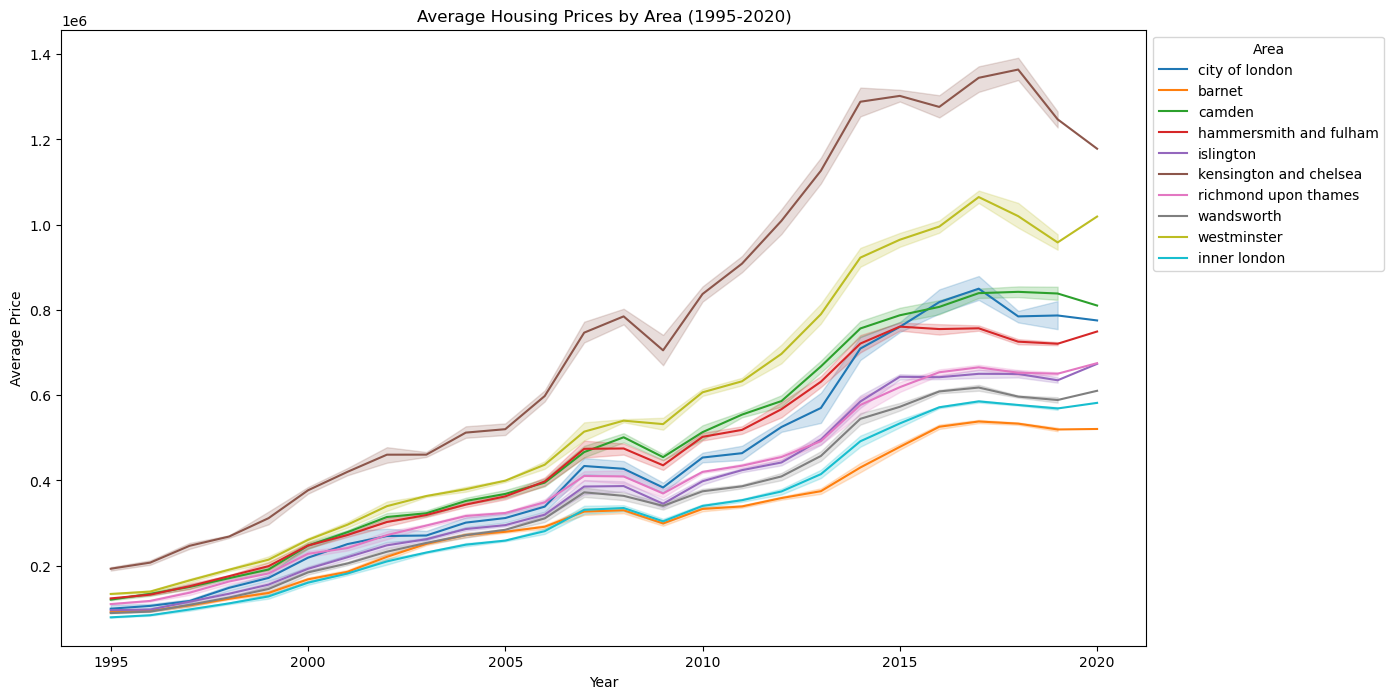

In [24]:
top_10 = df[df['area'].isin(top_10_areas.index)]
plt.figure(figsize=(14, 8))
sns.lineplot(top_10, x='year', y='average_price', hue='area')
plt.title('Average Housing Prices by Area (1995-2020)')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.legend(title='Area', bbox_to_anchor=(1, 1))
plt.show()

In [ ]:
# Digging into the numbers for London and England 📊🏴󠁧󠁢󠁥󠁮󠁧󠁿
# Calculation of average property prices for each year for London and England

In [25]:
london = df[df['area'] == 'london']
england = df[df['area'] == 'england']

In [26]:
avg_london = london.groupby('year')['average_price'].mean()
avg_england = england.groupby('year')['average_price'].mean()

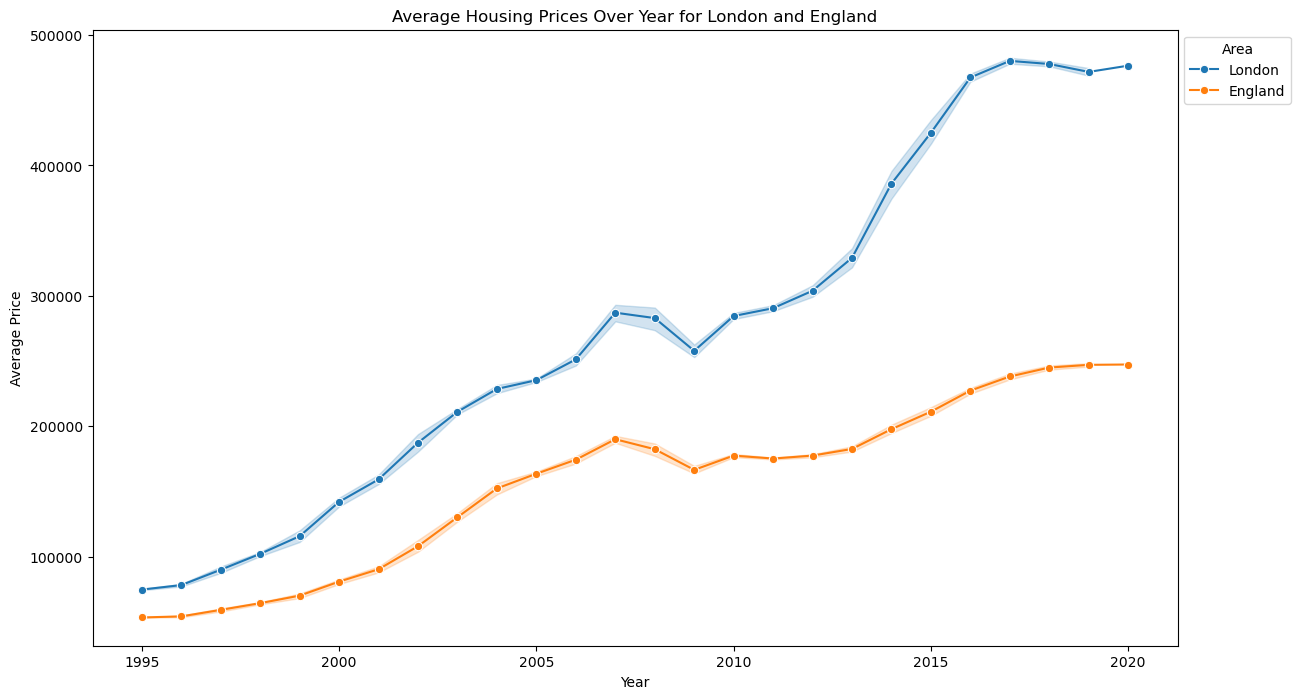

In [27]:
plt.figure(figsize=(14, 8))
sns.lineplot(london, x='year', y='average_price', label='London', marker='o')
sns.lineplot(england, x='year', y='average_price', label='England', marker='o')
plt.title('Average Housing Prices Over Year for London and England')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.legend(title='Area', bbox_to_anchor=(1, 1))
plt.show()

In [ ]:
# Unveiling the priciest corners of England's real estate market! 💸🏡
# Finding and displaying the 10 most expensive regions

In [13]:
england_regions = df[df['borough_flag'] == 0]

avg_by_region = england_regions.groupby('area')['average_price'].mean().reset_index()

top_10_expensive_regions = avg_by_region.sort_values('average_price', ascending=False).head(10)

print("Top 10 Expensive Regions:")
print(top_10_expensive_regions)

Top 10 Expensive Regions:
                    area  average_price
3           inner london  314994.421927
4                 london  265517.425249
7           outer london  239366.019934
8             south east  196067.076159
1        east of england  171182.229236
9             south west  163353.252492
2                england  153068.843854
10         west midlands  127102.840532
0          east midlands  121649.890365
11  yorks and the humber  109112.677741


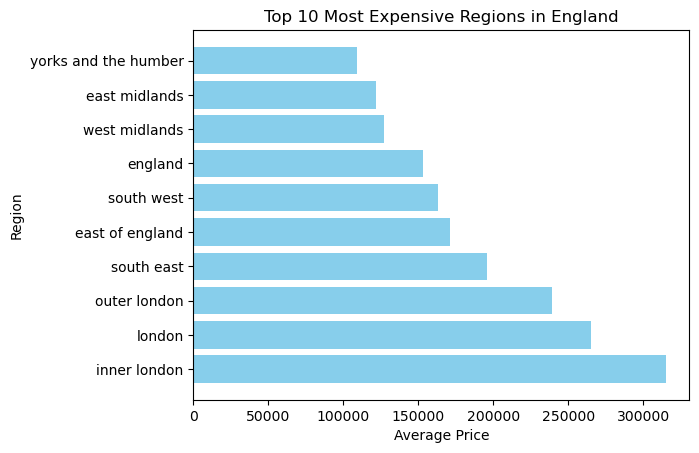

In [14]:
plt.barh(top_10_expensive_regions['area'], top_10_expensive_regions['average_price'], color='skyblue')
plt.title('Top 10 Most Expensive Regions in England')
plt.xlabel('Average Price')
plt.ylabel('Region')
plt.show()

In [ ]:
# Diving into the high-stakes game of London's real estate! 🏙️💰
# Discovering the cream of the crop - the top 10 most expensive boroughs

In [28]:
london_boroughs = df[(df['borough_flag'] == 1) & (df['area'] != 'london')]

avg_by_borough = london_boroughs.groupby('area')['average_price'].mean().reset_index()

top_10_expensive_boroughs = avg_by_borough.sort_values('average_price', ascending=False).head(10)

print("Top 10 expensive boroughs:")
print(top_10_expensive_boroughs)

Top 10 expensive boroughs:
                      area  average_price
19  kensington and chelsea  742060.368771
32             westminster  543865.936877
5                   camden  467500.910299
12  hammersmith and fulham  443791.860465
6           city of london  423942.584718
26    richmond upon thames  382615.960133
18               islington  365187.717608
31              wandsworth  342304.199336
1                   barnet  304991.089701
13                haringey  292969.634551


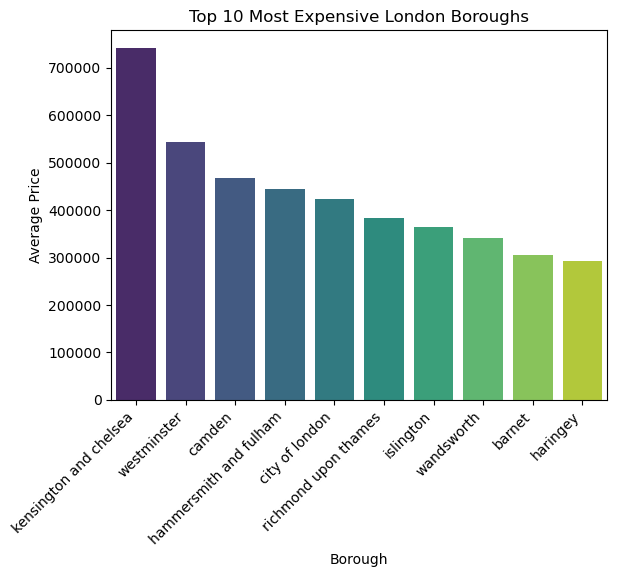

In [29]:
sns.barplot(top_10_expensive_boroughs, x='area', y='average_price', palette='viridis')
plt.title('Top 10 Most Expensive London Boroughs')
plt.xlabel('Borough')
plt.ylabel('Average Price')
plt.xticks(rotation=45, ha='right')
plt.show()